___
# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [2]:
import os
os.chdir("../17-K-Means-Clustering")
df=pd.read_csv('College_Data', header=0, index_col=0)

**Check the head of the data**

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [38]:
print(len(df.columns))
cols=df.drop('Private', axis=1).columns
for i in range(len(cols)):
    if cols[i]=='Grad.Rate' or cols[i]=='Room.Board':
        print(i, cols[i])

18
8 Room.Board
16 Grad.Rate


In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

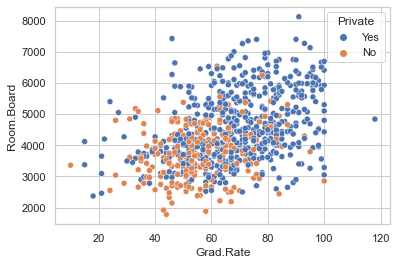

In [6]:
sns.set(style='whitegrid')
sns.scatterplot(data=df, y='Room.Board', x='Grad.Rate', hue='Private')

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

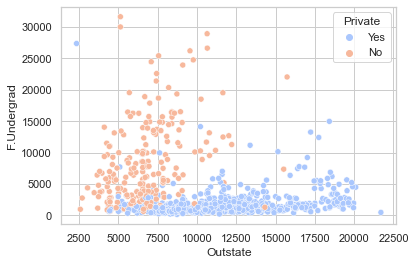

In [7]:
sns.scatterplot(data=df, x='Outstate', y='F.Undergrad', hue='Private', palette='coolwarm')

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

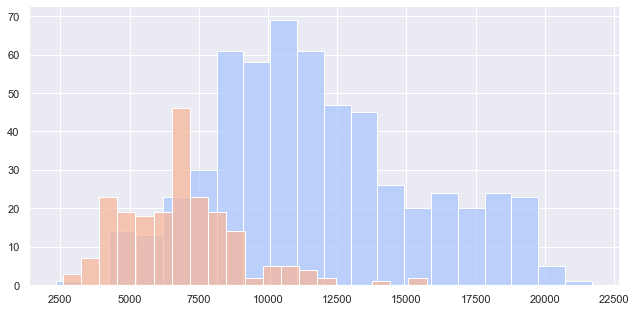

In [8]:
sns.set(style='darkgrid')
fg=sns.FacetGrid(df,hue="Private", palette="coolwarm", height=4.5, aspect=2)
fg=fg.map_dataframe(sns.histplot, x="Outstate", bins=20)

**Create a similar histogram for the Grad.Rate column.**

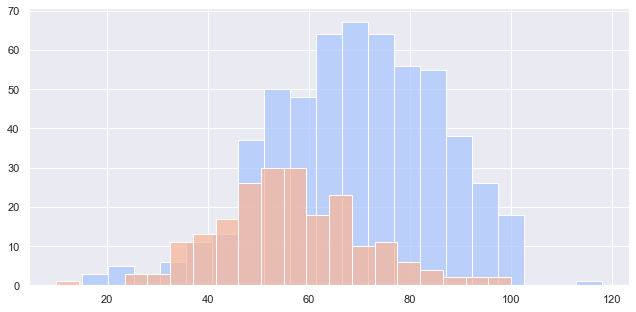

In [9]:
sns.set(style='darkgrid')
fg=sns.FacetGrid(df,hue="Private", palette="coolwarm", height=4.5, aspect=2)
fg=fg.map_dataframe(sns.histplot, x="Grad.Rate", bins=20)

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [10]:
df[df["Grad.Rate"]>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [11]:
df["Grad.Rate"].loc["Cazenovia College"] = 100

C:\Users\Ayush\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df[df["Grad.Rate"]>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


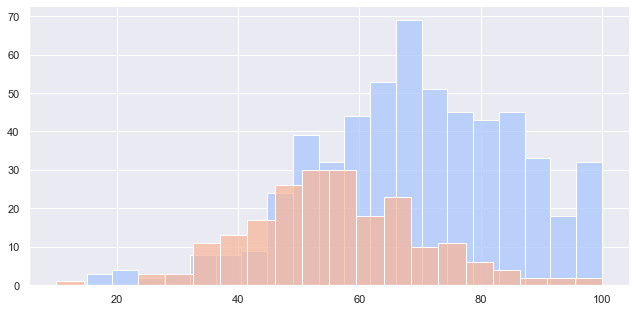

In [13]:
sns.set(style='darkgrid')
fg=sns.FacetGrid(df,hue="Private", palette="coolwarm", height=4.5, aspect=2)
fg=fg.map_dataframe(sns.histplot, x="Grad.Rate", bins=20)

## K Means Cluster Creation

We will now start creating the Cluster labels!

** Import KMeans from SciKit Learn.**

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Standardize the data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Private', axis=1))
std_df=scaler.transform(df.drop('Private', axis=1))

** Create an instance of a K Means model with 2 clusters.**

In [22]:
model_arr=[]
cost=np.zeros(11)
silh_score = []


for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(std_df)
    cost[i]=kmeans.inertia_
    model_arr.append(kmeans)
    score = silhouette_score(std_df,labels=kmeans.labels_, metric='euclidean')
    silh_score.append(score)
    print(" for k = {one}, Silhouette Score {two}".format(one=i, two=score))

 for k = 2, Silhouette Score 0.2286626165244013
 for k = 3, Silhouette Score 0.24135277875556102
 for k = 4, Silhouette Score 0.18275795357384308
 for k = 5, Silhouette Score 0.18339743830348187
 for k = 6, Silhouette Score 0.1640718934231675
 for k = 7, Silhouette Score 0.13754829222801782
 for k = 8, Silhouette Score 0.14234097601881265
 for k = 9, Silhouette Score 0.11613406784335834
 for k = 10, Silhouette Score 0.11638531783273186


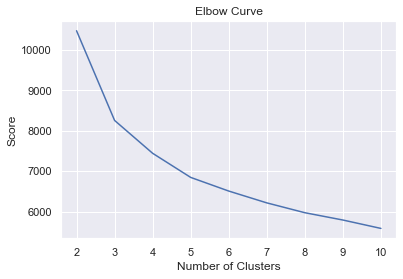

In [27]:
# Elbow Curve
df_cost = pd.DataFrame({'cluster':range(2,11), 'cost':cost[2:] , 'silhouette_score':silh_score})

import pylab as pl
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

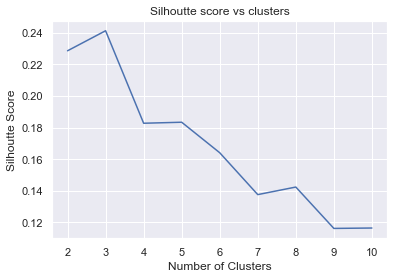

In [33]:
pl.plot(df_cost.cluster, df_cost.silhouette_score)
pl.xlabel('Number of Clusters')
pl.ylabel('Silhoutte Score')
pl.title('Silhoutte score vs clusters')
pl.show()

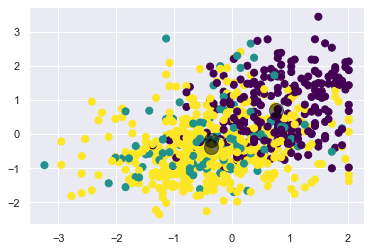

In [49]:
# It seems that our k value for optimal number of clusters is 3

df['segment']=model_arr[1].labels_

centriod = model_arr[1].cluster_centers_
plt.scatter(std_df[:, 16], std_df[:, 8], c=df['segment'], s=50, cmap='viridis')

plt.scatter(centriod[:, 16], centriod[:, 8], c='black', s=200, alpha=0.5)

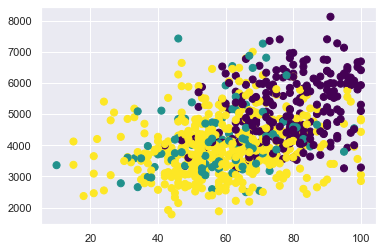

In [50]:
plt.scatter(df['Grad.Rate'], df['Room.Board'], c=df['segment'], s=50, cmap='viridis')